In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Dense, Activation
from keras import regularizers
import tensorflow as tf
import keras as ke
import matplotlib.pyplot as plt
import numpy as np

/Users/theodiamandis/anaconda3/envs/cs231n/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
load_dir = "assets/car-rocket-ship/imnet_nofc/VGG19/128x128/"
X_train = np.load(load_dir + 'X_train.npy')
y_train = np.load(load_dir + 'y_train.npy')
X_test = np.load(load_dir + 'X_test.npy')
y_test = np.load(load_dir + 'y_test.npy')
N_tr = X_train.shape[0]
N_te = X_test.shape[0]
X_train = X_train.reshape(N_tr,-1)
X_test = X_test.reshape(N_te,-1)
in_size = X_train.shape[1]

In [3]:
reg=0.001
if 0:
    model = Sequential([
        Dense(100,input_shape=(in_size,),kernel_regularizer=regularizers.l2(reg)),
        Activation('relu'),
        Dropout(0.3),
        Dense(50,kernel_regularizer=regularizers.l2(reg)),
        Activation('relu'),
        Dropout(0.3),
        Dense(3,kernel_regularizer=regularizers.l2(reg)),
        Activation('softmax')
        ])
if 0:
    model = Sequential([
        Dense(3,input_shape=(in_size,),kernel_regularizer=regularizers.l2(0.001)),
        Activation('softmax')
        ])

if 1:
    model = Sequential([
        #Dropout(0,input_shape=(in_size,)),
        Dense(10,input_shape=(in_size,),kernel_regularizer=regularizers.l2(0.5)),
        Activation('relu'),
        Dense(3,kernel_regularizer=regularizers.l2(reg)),
        Activation('softmax')
        ])

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

Train on 600 samples, validate on 600 samples
Epoch 1/15
 - 0s - loss: 10.9676 - acc: 0.3933 - val_loss: 10.6675 - val_acc: 0.3933
Epoch 2/15
 - 0s - loss: 10.2586 - acc: 0.5400 - val_loss: 9.7721 - val_acc: 0.6417
Epoch 3/15
 - 0s - loss: 9.3155 - acc: 0.6850 - val_loss: 8.8162 - val_acc: 0.7050
Epoch 4/15
 - 0s - loss: 8.3727 - acc: 0.7467 - val_loss: 7.8598 - val_acc: 0.7450
Epoch 5/15
 - 0s - loss: 7.4564 - acc: 0.7917 - val_loss: 7.0832 - val_acc: 0.6867
Epoch 6/15
 - 0s - loss: 6.6474 - acc: 0.7817 - val_loss: 6.2036 - val_acc: 0.8433
Epoch 7/15
 - 0s - loss: 5.8483 - acc: 0.8533 - val_loss: 5.5247 - val_acc: 0.8333
Epoch 8/15
 - 0s - loss: 5.1980 - acc: 0.8617 - val_loss: 4.9279 - val_acc: 0.8250
Epoch 9/15
 - 0s - loss: 4.5977 - acc: 0.8783 - val_loss: 4.3724 - val_acc: 0.8350
Epoch 10/15
 - 0s - loss: 4.0824 - acc: 0.8783 - val_loss: 3.8883 - val_acc: 0.8533
Epoch 11/15
 - 0s - loss: 3.6297 - acc: 0.8833 - val_loss: 3.4727 - val_acc: 0.8683
Epoch 12/15
 - 0s - loss: 3.2418 - a

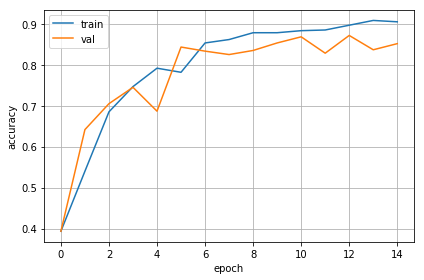

In [4]:
# Train the model and plot training info

hist = model.fit(X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size = 100,
    epochs=15,
    verbose=2
    )
plt.plot(hist.history['acc'], label="train")
plt.plot(hist.history['val_acc'], label="val")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
def weights_grad(X,model):
	N = X.shape[0]
	M = model.output.shape[1]
	w = model.trainable_weights
	out = model.layers[-2].output 
	grads = []
	for i in range(N): #iterate over the batch
		for j in range(M): #iterate over class score
			grads.append(k.gradients(out[i,j],w))
	sess = tf.InteractiveSession()
	sess.run(tf.global_variables_initializer())
	grads_evaled = sess.run(grads,feed_dict={model.input:X})
	# grads_evaled is is an M*N list of the gradients of the weights.
	# each element of this list in another list, that will be something like
	# [W1_grad, b1_grad, W2_grad, b2_grad ...]
	return grads_evaled